<a href="https://colab.research.google.com/github/Raghad770/VGG11-13-16-19-implementation-with-Keras/blob/main/VGG11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "raghadsayed" # username from the json file
os.environ['KAGGLE_KEY'] = "c77af906ed5f195ca3f3b6026290e88d" # key from the json file

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:06<00:00, 41.2MB/s]
100% 346M/346M [00:06<00:00, 54.3MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [5]:
! ls

gdrive				sample_data  seg_test
intel-image-classification.zip	seg_pred     seg_train


# set paths of the training, test, and validation data 

In [6]:
train_path='/content/seg_train/seg_train'
test_path='/content/seg_test/seg_test'
validation_path='/content/seg_train/seg_pred'

# import important libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
import shutil
import glob

In [8]:
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][100:106]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 6, idx+1)        
        img = plt.imread(img_path)
        plt.tight_layout() 
        plt.axis('off')
        plt.imshow(img, cmap='gray')

# Data augmentation 

In [9]:
img_height = 224
img_width = 224

training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                    rescale=1/255.0,
                                                                    validation_split=0.15)

train_generator = training_data_gen.flow_from_directory(train_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=64,
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='training') # set as training data

validation_generator = training_data_gen.flow_from_directory(train_path, # same directory as training data
                                                             target_size=(img_height, img_width),
                                                             batch_size=64,
                                                             shuffle=True,
                                                             class_mode='categorical',
                                                             subset='validation') # set as validation data
 

testing_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

test_generator = testing_data_gen.flow_from_directory(test_path,
                                                      target_size=(img_height, img_width),
                                                      batch_size=60,
                                                      seed=0,
                                                      shuffle=False,
                                                      class_mode='categorical') 

Found 11932 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


> represent each image with a specific numb for each different class
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }


In [10]:
train_generator.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

> print a matrix of the first image and its label 

In [ ]:
print(train_generator[0])

# store the matrices of all images in array "img" and their labels in array "label"

In [ ]:
img,label=next(train_generator)
print(label)

> print images with their class name

[0. 0. 1. 0. 0. 0.]
2
glacier


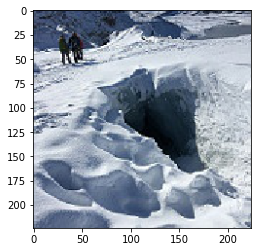

In [13]:
labels=['buildings','forest','glacier','mountain','sea','street']
image = img[1]
label = label[1]
print (label)
li=list(label)
res=li.index(1)
print(res)
print(labels[res])
plt.imshow(image)
plt.show()

0
/content/seg_train/seg_train/sea
/content/seg_train/seg_train/sea/6166.jpg
1
/content/seg_train/seg_train/mountain
/content/seg_train/seg_train/mountain/13177.jpg
2
/content/seg_train/seg_train/forest
/content/seg_train/seg_train/forest/12576.jpg
3
/content/seg_train/seg_train/buildings
/content/seg_train/seg_train/buildings/13624.jpg
4
/content/seg_train/seg_train/street
/content/seg_train/seg_train/street/3440.jpg
5
/content/seg_train/seg_train/glacier
/content/seg_train/seg_train/glacier/18638.jpg


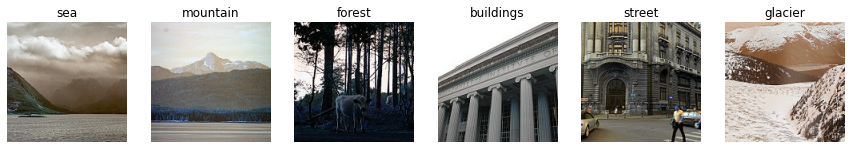

In [14]:
# to show images form img array
import cv2
%matplotlib inline
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 4, figsize=(10,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        #ax.axis('off')
    plt.tight_layout()
    plt.show()
#----------------------------------------------------------------------------------------------------------------------------
# to show images by bath form directory  
fig = plt.figure(figsize=(15,10))
columns = 6
rows = 1
fielName = train_path

for i in range(columns*rows ):
      # each loop takes a different name each file in the directory in order so first time takes mountain, street, buildings,....
      folderName = os.path.join((fielName), os.listdir(fielName)[i])
      print(i)
      print(folderName)
      img = cv2.imread(folderName+'/'+(os.listdir(folderName)[i]))
      print(folderName+'/'+(os.listdir(folderName)[i]))
      fig.add_subplot(rows, columns, i+1)
      plt.imshow(img)
      plt.axis('off')
      #to print each image with the folder name
      plt.title(os.path.basename(folderName))

plt.show()

In [ ]:
plotImages(img)

# impelemntation of VGG11 model

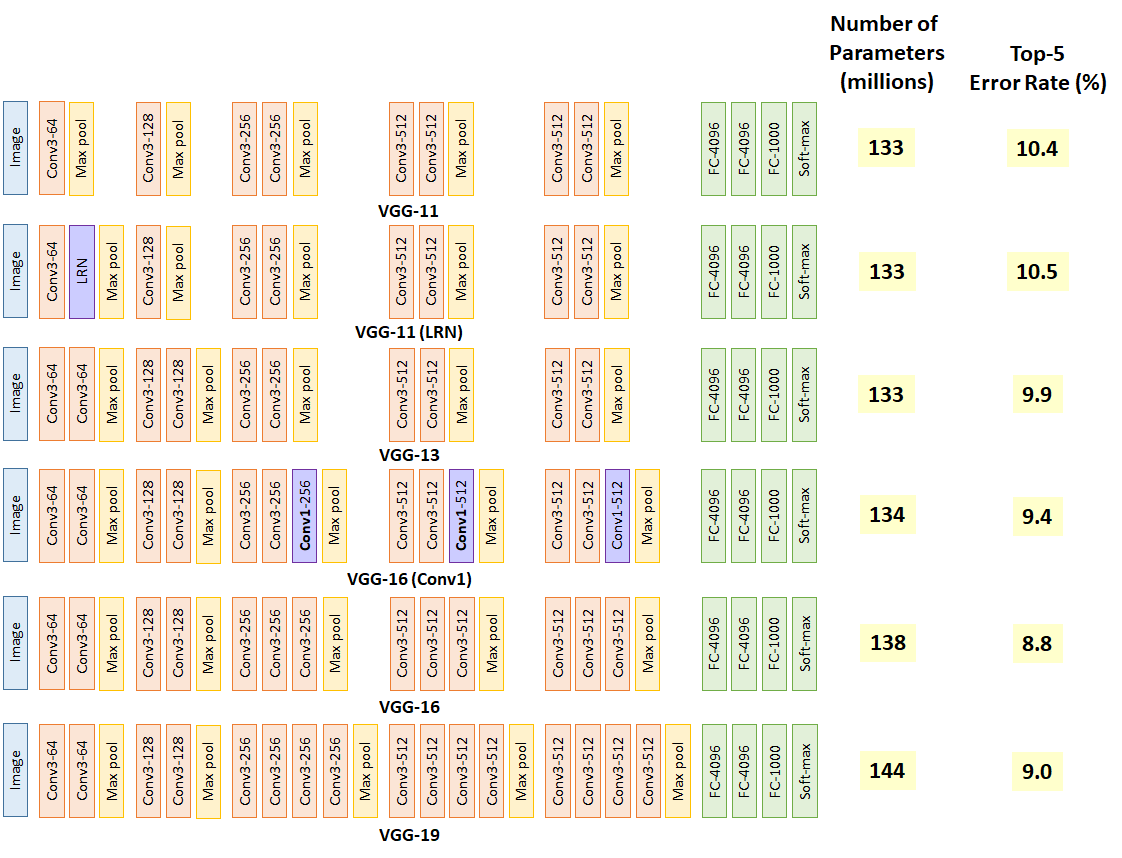

In [15]:
model_11=tf.keras.models.Sequential()

model_11.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same',input_shape=(224,224,3)))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Flatten())

model_11.add(tf.keras.layers.Dense(units=4096,activation='relu'))
model_11.add(tf.keras.layers.Dropout(.5))

model_11.add(tf.keras.layers.Dense(units=4096,activation='relu'))
model_11.add(tf.keras.layers.Dropout(0.5))

model_11.add(tf.keras.layers.Dense(units=6,activation='softmax'))


In [16]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0

In [18]:
model_11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history=model_11.fit(train_generator,validation_data=validation_generator, epochs=10,verbose=1)

Epoch 1/10
187/187 [==============================] - 171s 908ms/step - loss: 0.9809 - accuracy: 0.6164 - val_loss: 0.9306 - val_accuracy: 0.6327
Epoch 2/10
187/187 [==============================] - 159s 848ms/step - loss: 0.7661 - accuracy: 0.7065 - val_loss: 0.6718 - val_accuracy: 0.7683
Epoch 3/10
187/187 [==============================] - 159s 848ms/step - loss: 0.6458 - accuracy: 0.7586 - val_loss: 0.5584 - val_accuracy: 0.8097
Epoch 4/10
187/187 [==============================] - 159s 850ms/step - loss: 0.5116 - accuracy: 0.8165 - val_loss: 0.4951 - val_accuracy: 0.8254
Epoch 5/10
187/187 [==============================] - 159s 850ms/step - loss: 0.4373 - accuracy: 0.8427 - val_loss: 0.5041 - val_accuracy: 0.8264
Epoch 6/10
187/187 [==============================] - 159s 850ms/step - loss: 0.3649 - accuracy: 0.8694 - val_loss: 0.5291 - val_accuracy: 0.8202
Epoch 7/10
187/187 [==============================] - 159s 850ms/step - loss: 0.3088 - accuracy: 0.8931 - val_loss: 0.4432 -

NameError: ignored

Save the training history


In [29]:
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_11', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
      
# save the entire model with HDF5 format
model_11.save('model_11.h5')

In [30]:
history.history??

In [34]:
history_11 = pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_11',"rb"))

In [35]:
print(history_11)

{'loss': [0.9808911681175232, 0.7660500407218933, 0.6457832455635071, 0.5116069912910461, 0.4373207688331604, 0.36488330364227295, 0.3087712824344635, 0.26838791370391846, 0.21235859394073486, 0.16323140263557434], 'accuracy': [0.6164096593856812, 0.7065035104751587, 0.758632242679596, 0.8165437579154968, 0.8426918983459473, 0.8694267272949219, 0.8931444883346558, 0.9036205410957336, 0.9242373704910278, 0.9403285384178162], 'val_loss': [0.930648922920227, 0.6717979311943054, 0.5584377646446228, 0.49513041973114014, 0.5040574073791504, 0.5290980935096741, 0.44323718547821045, 0.47168609499931335, 0.5008860230445862, 0.60272216796875], 'val_accuracy': [0.6327307224273682, 0.7683159112930298, 0.8097050189971924, 0.8254044055938721, 0.8263558745384216, 0.8201712369918823, 0.853472888469696, 0.8525214195251465, 0.8487154841423035, 0.8558515906333923]}


In [23]:
! ls

gdrive				model_11.h5  seg_pred  seg_train
intel-image-classification.zip	sample_data  seg_test
